## Final project

NAME = "Anna Nguyen"


In [13]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import scipy.stats
import math
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm

### Correlation between number of property crimes in a neighborhood and its various socio-economic attributes 

#### a. Overview

  When I move to a new neighborhood, I'm mostly concerned about the risk of having to experience autothefts or break-ins and robberies. Leveraging on what I've learned in class, I want to create my own assessment model. We will look at various input variales, establish whether there is correlation between each of them and the number of crimes in each area, and arrive at a model that can predict the number of crimes based on identified predictors. 

As violent crimes (rapes, murders, etc.) normally have other contributing factors beyond mere socio-economic attributes, we will not consider them under the scope of this project. Rather, we will focus on robberies, auto-thefts and burglaries which are primarily property offenses. 

With regards to the possible predictors, we can use the list of crime factors from the website of North Carolina State Bureau of Investigation (* ) as a reference. Youth concentration, stability of population with respect to residents' mobility, educational characteristics, economic conditions and effective strength of law enforcement agencies were mentioned among those factors. From the data provided, some attributes could be considered as relevant indicators of such factors:

- percentage of those from 12-21 (youth concentration) for variations in composition of the population
- number of homeless people for stability of population
- median income, percentage of unemployment, percentage of people under poverty level for economic conditions
- percentage of people 25 and over with less than a 9th grade education for educational characteristic
- number of police officers for the relative presence of law enforcement unit
- population density and percent of persions living in dense housing conditions for population density and degree of urbanization
- percentage of population who are divorced for family conditions with respect to divorce and family cohesiveness

Using data from the 1990 census and the crime statistics from the 1995 FBI UCR, I aim to understand the correlation between those contributing factors with the crime rates and use the regression model to help determine a neighborhood’s crime rate, which in this case will be total number of burglaries, robberies, larcenies, and auto-thefts per 100k population.

(*) Source:  North Carolina State Bureau of Investigation (2022). Crime Factors 
https://ncsbi.gov/Services/Crime-Statistics/Crime-Factors#:~:text=Economic%20conditions%2C%20including%20median%20income,Climate.

#### b. Source of data and data summary

The data can be found on UCI ML data repository. As mentioned by the contributor, this set leverages on various sources, it is a mixture of socio-economic data from the '90 Census, law enforcement data from the 1990 Law Enforcement Management and Admin Stats survey, and crime data from the 1995 FBI UCR. The types of data include key characteristics that pertain to a neighborhood, namely demographics proportions, income per capita, number of crimes for various types of crimes (robberies, burglaries, auto-thefts, rapes, etc.) and also number of police officers on duty. With regards to the scope of this project, I will be looking at solely burglaries, auto-thefts, larcenies and robberies. 

Source: Redmond, M. (2011). Communities and Crime Unnormalized Data Set https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized#

#### c. Data fundamentals (size and number of attributes)

The data set has a reasonably sufficient size of 2215 entries with each being a community (town/city) from various states in the US. All crime data were related to 1995 which will then eliminate the influence of macroeconomic factors (recession might give rise to more crimes).

#### d. Exploratory Data Analysis (cleaning process/data visualization/discussion)

#### d.1 Data Cleaning

There were a total of 147 attributes in the original data set, many of which are not relevant under the scope of this projects (race%, gender%, etc). 

The following attributes will make up our response variable - the number of crimes per 100k population:
-	Number of burglaries per 100k population 
-	Number of auto-thefts per 100k population
-	Number of robberies per 100k population 

> Using the “per 100k population” info will eliminate the community size bias, we will replace null values from the data with 0 as there are not many of those and also due to the fact that we will sum the crime rates up. Note that we will create a new column combining number of burglaries, number of auto-thefts and number of robberies per 100k population and refer to that as “Crime rates”

The following attributes will be considered for selection of predictors (input variables of the model):
-	Good to continue: Median household income - medIncome
-   Good to continue: Percentage of people 16 and over in labor force and unemployed - PctUnemployed
-   Good to continue: Percentage of population that are 12-21 in age - agePct12t21
-	Good to continue: Number of homeless people - we will need to eliminate null value, if any, and conver to number of homeless people on the street per 100k population for comparison.
-   Good to continue: percentage of people 25 and over with less than a 9th grade education - PctLess9thGrade
-   Good to continue: percentage of people under the poverty level - PctPopUnderPov
-   Good to continue: population density - PopDens
-   Good to continue: percent of persons in dense housing (more than 1 person per room) - PctPersDenseHous
-   Good to continue: percentage of population who are divorced - TotalPctDiv
-   To be dropped due to data unvailability: Number of sworn-in full time police officers in field operations per 100k population – It should be noted that only about 350 entries from the set contain data for this attribute. Due to the fact that information on Police presence is not complete (1872 NULL entries as shown below), we will consider drop this variable. 


In [2]:
all = pd.read_csv("CrimesByCommunity.csv", encoding='latin-1')

In [23]:
all.columns = all.columns.str.replace(' ', '')
all.head()

,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,nonViolPerPop,HomelessonStreets,HomelessinShelters,HomelessPer100k,Police,RobberiesPer100k,BurglariesPer100k,AutoTheftsPer100k,LarceniesPer100k,NumberofCrimesPer100k
0,BerkeleyHeightstownship,NJ,39,5320,1,11980.0,3.10,1.37,91.78,6.50,...,1394.59,0.0,11.0,91.819699,-1.0,8.20,114.85,131.26,1132.08,1386.39
1,Marpletownship,PA,45,47616,1,23123.0,2.82,0.80,95.57,3.44,...,1955.95,0.0,0.0,0.000000,-1.0,21.26,242.37,110.55,1598.78,1972.96
2,Tigardcity,OR,?,?,1,29344.0,2.43,0.74,94.33,3.43,...,6167.51,0.0,16.0,54.525627,-1.0,154.95,758.14,376.30,4972.19,6261.58
3,Gloversvillecity,NY,35,29443,1,16656.0,2.40,1.70,97.35,0.50,...,?,0.0,0.0,0.000000,-1.0,57.86,1301.78,271.93,4142.56,5774.13
4,Bemidjicity,MN,7,5068,1,11245.0,2.76,0.53,89.16,1.17,...,9988.79,0.0,2.0,17.785683,-1.0,32.04,728.93,728.93,8490.87,9980.77


As mentioned above, we will need to clean the data and create a different dataframe that contain only entries with non-null PolicPerPop when investigating the correlation between average numebr of polic and crime rates. We will replace these with "-1" and convert all data to numeric. 
Similarly, for robberies, burglaries and authoTheft per 100k population, we will convert any "?" to "0" assuming there are none. 
When running the same check for Population, MedIncome and Number of Homeless People, Unemployment percentage, youth concentration, Percentage Under Poverty level, Percentage with Education less than 9th grade and Population Density, the program throws an error indicating no such entry exists in such of these columns. 

In [251]:
#print("Number of ? in population is",project_df.population.value_counts()['?'])
#print("Number of ? in medIncome is",project_df.medIncome.value_counts()['?'])
print("Number of ? in Police per Pop is",all.PolicPerPop.value_counts()['?'])
print("Number of ? in FT officer per Pop is",all.LemasSwFTPerPop.value_counts()['?'])
print("Number of ? in Field  FT officer per Pop is",all.LemasSwFTFieldPerPop.value_counts()['-1'])
print("Number of ? in Police on Patrol is",all.LemasPctPolicOnPatr.value_counts()['?'])
print("Number of ? in Police budget per pop is",all.PolicBudgPerPop.value_counts()['?'])
print("Number of ? in Officers assigned to Drug Units",all.OfficAssgnDrugUnits.value_counts()['?'])
print("Number of ? in Average Police OT worked is",all.PolicAveOTWorked.value_counts()['?'])
print("Number of ? in Requests per Police Officer is",all.PolicReqPerOffic.value_counts()['?'])
#print("Number of ? in Percentage living under Poverty is",all.PctPopUnderPov.value_counts()['?'])
#print("Number of ? in Percentage of ppl over 25 with less than 9th grade education is",all.PctLess9thGrade.value_counts()['?'])
#print("Number of ? in Population density",all.PopDens.value_counts()['?'])
#print("Number of ? in Recent Immigrant",all.PctImmigRecent.value_counts()['?'])
#print("Number of ? in those not speak English well",all.PctNotSpeakEnglWell.value_counts()['?'])
#print("Number of ? in Dense Housing",all.PctPersDenseHous.value_counts()['?'])
#print("Number of ? in Foreign Born",all.PctForeignBorn.value_counts()['?'])
#print("Number of ? in Div",all.TotalPctDiv.value_counts()['?'])

Number of ? in Police per Pop is 1872
Number of ? in FT officer per Pop is 1872
Number of ? in Field  FT officer per Pop is 1872
Number of ? in Police on Patrol is 1872
Number of ? in Police budget per pop is 1872
Number of ? in Officers assigned to Drug Units 1872
Number of ? in Average Police OT worked is 1872
Number of ? in Requests per Police Officer is 1872


The following tasks are performed in the following code block:
- Replacing the "?" with "-1" for Number of Police (so later we can carve out a separate data set; since many of the entries are missing this attribute and thus assuming them to be 0 will impact the integrity of the calculations, we need to exclude them from our calculations).
- Replacing "?" with "0" for Number of robberies, Number of burglaries, Number of autothefts and Number of larcenies. There are not many of such occasions; thus, replacing them with 0 will not impact data integrity. 
- Convert all the relevant data columns to float type (numeric) so they can be ready for calculations
- Sum up HomelessonStreets and HomelessinShelters and divide by population and multiply by 100000 to get to Number of Homeless people per 100k (density)
- Sum up numbers of burglaries, robberies and autothefts to get the Total Number of Crimes => this will be the response in our model. 

In [262]:
all['robbbPerPop'] = all['robbbPerPop'].replace(['?'], '0')
all["burglPerPop"] = all["burglPerPop"].replace(['?'], '0')
all["autoTheftPerPop"] = all["autoTheftPerPop"].replace(['?'], '0')
all["larcPerPop"] = all["larcPerPop"].replace(['?'], '0')
all["LemasSwFTFieldPerPop"] = all["LemasSwFTFieldPerPop"].replace(['?'], '-1')
all["population"] = all["population"].astype(float)
all["agePct12t21"] = all["agePct12t21"].astype(float)
all["PctUnemployed"] = all["PctUnemployed"].astype(float)
all["PctPopUnderPov"] = all["PctPopUnderPov"].astype(float)
all["PopDens"] = all["PopDens"].astype(float)
all["PctLess9thGrade"] = all["PctLess9thGrade"].astype(float)
all["HomelessonStreets"] = all["NumStreet"].astype(float)
all["HomelessinShelters"] = all["NumInShelters"].astype(float)
all["HomelessPer100k"] =  (all.NumStreet + all.NumInShelters)/all.population*100000
all["Police"] = all["LemasSwFTFieldPerPop"].astype(float)
all["PctPersDenseHous"] = all["PctPersDenseHous"].astype(float)
all["TotalPctDiv"] = all["TotalPctDiv"].astype(float)
all["RobberiesPer100k"] = all["robbbPerPop"].astype(float)
all["BurglariesPer100k"] = all["burglPerPop"].astype(float)
all["AutoTheftsPer100k"] = all["autoTheftPerPop"].astype(float)
all["LarceniesPer100k"] = all["larcPerPop"].astype(float)
all["CrimesPer100k"] =  all.RobberiesPer100k + all.BurglariesPer100k + all.AutoTheftsPer100k
all["CrimesPer100kinclLar"] =  all.RobberiesPer100k + all.BurglariesPer100k + all.AutoTheftsPer100k + all.LarceniesPer100k
all.head()


,communityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,HomelessinShelters,HomelessPer100k,Police,RobberiesPer100k,BurglariesPer100k,AutoTheftsPer100k,LarceniesPer100k,NumberofCrimesPer100k,CrimesPer100k,CrimesPer100kinclLar
0,BerkeleyHeightstownship,NJ,39,5320,1,11980.0,3.10,1.37,91.78,6.50,...,11.0,91.819699,-1.0,8.20,114.85,131.26,1132.08,1386.39,254.31,1386.39
1,Marpletownship,PA,45,47616,1,23123.0,2.82,0.80,95.57,3.44,...,0.0,0.000000,-1.0,21.26,242.37,110.55,1598.78,1972.96,374.18,1972.96
2,Tigardcity,OR,?,?,1,29344.0,2.43,0.74,94.33,3.43,...,16.0,54.525627,-1.0,154.95,758.14,376.30,4972.19,6261.58,1289.39,6261.58
3,Gloversvillecity,NY,35,29443,1,16656.0,2.40,1.70,97.35,0.50,...,0.0,0.000000,-1.0,57.86,1301.78,271.93,4142.56,5774.13,1631.57,5774.13
4,Bemidjicity,MN,7,5068,1,11245.0,2.76,0.53,89.16,1.17,...,2.0,17.785683,-1.0,32.04,728.93,728.93,8490.87,9980.77,1489.90,9980.77


We now carve out only the specific attributes we need for our model

In [263]:
project_df = all[["communityname","PopDens","PctPersDenseHous","TotalPctDiv","medIncome","agePct12t21","PctUnemployed","HomelessPer100k","PctPopUnderPov","PctLess9thGrade","Police","CrimesPer100k","CrimesPer100kinclLar"]]
project_df.describe()

,PopDens,PctPersDenseHous,TotalPctDiv,medIncome,agePct12t21,PctUnemployed,HomelessPer100k,PctPopUnderPov,PctLess9thGrade,Police,CrimesPer100k,CrimesPer100kinclLar
count,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000,2215.000000
mean,2783.835034,4.132438,10.812515,33984.696163,14.445837,6.045242,70.228896,11.620537,9.186646,31.804858,1667.893395,5036.304176
std,2828.993341,5.599131,3.000883,13424.680011,4.518623,2.895618,145.778833,8.600352,6.666703,120.172881,1312.638739,2858.501468
min,10.000000,0.050000,2.830000,8866.000000,4.580000,1.320000,0.000000,0.640000,0.200000,-1.000000,25.380000,55.750000
25%,1181.900000,1.290000,8.575000,23817.000000,12.250000,4.045000,0.000000,4.510000,4.640000,-1.000000,751.345000,2973.715000
50%,2027.300000,2.340000,10.900000,31441.000000,13.620000,5.450000,0.000000,9.330000,7.740000,-1.000000,1273.530000,4524.770000
75%,3321.700000,4.730000,12.985000,41480.500000,15.360000,7.440000,83.019460,16.905000,11.835000,-1.000000,2169.835000,6397.670000
max,44229.900000,59.490000,22.230000,123625.000000,54.400000,31.230000,2109.704641,58.000000,49.890000,3290.620000,12406.340000,28482.800000


As mentioned above, a different set with fewer entries is needed for assessment of correlation between police presence and number of crimes. This is because many rows were missing this attribute in the original data set and only about 350 of them have this info. Previously we have replaced those "?" with "-1" and convert data to numeric, now we need to choose only those for which the attribute is greater than -1, meaning a numeric data point was available originally. 

#### d.2 Exploratory Data Analysis

- Having prepared the data, we shall now look at preliminary visualization of the "true" correlations between each of the 6 potential input variables with the output variable (number of crimes).
- There are some outliers from Unemployment rate, Number of Homeless People per 100k population and Number of Police per 100k population and most data points are densely concentrated within a certain range, which indicates that the input variables have approximately normal distributions with short tails. We can confirm that through kernel density plots showing the distribution of each of the potential predictors. 

From the pairplots, we can observe the following trends:
- There is a clear upward trendline in the scatterplot depicting relationship between Unemployment rate, PctPersDenseHous, TotalPctDiv, Percentage living under Poverty and Number of Crimes per 100k population. This suggests positive correlation. 
- Youth concentration plot also has slightly visible upward slope which also suggests positive correlation.
- Median Income, on the other hand, tends to be higher at areas with lower crime rates. This could possibly have a negative correlation with the number of crimes. However, due to data points being too densely presented, it is hard to interpret clearly. Perhaps we can leave this question to be addressed in the model training phase. 
- Number of Homeless people per 100k population data points are scattered wildly across the plot. It is hard to spell out a certain trend solely from the data visualization. 
- Number of Police in field operations per 100k population is the one with least visible trend. It appears that the density of police officers in the field is consistent across all areas in the data set, and they don't seem to have any visible impact on the number of crimes. This could also be due to the fact that there are only 350 entries for this set which limits the accuracy of the model. Due to lack of visible correlation and lack of data, we will drop this variable from the model and consider only the other 5 variables.


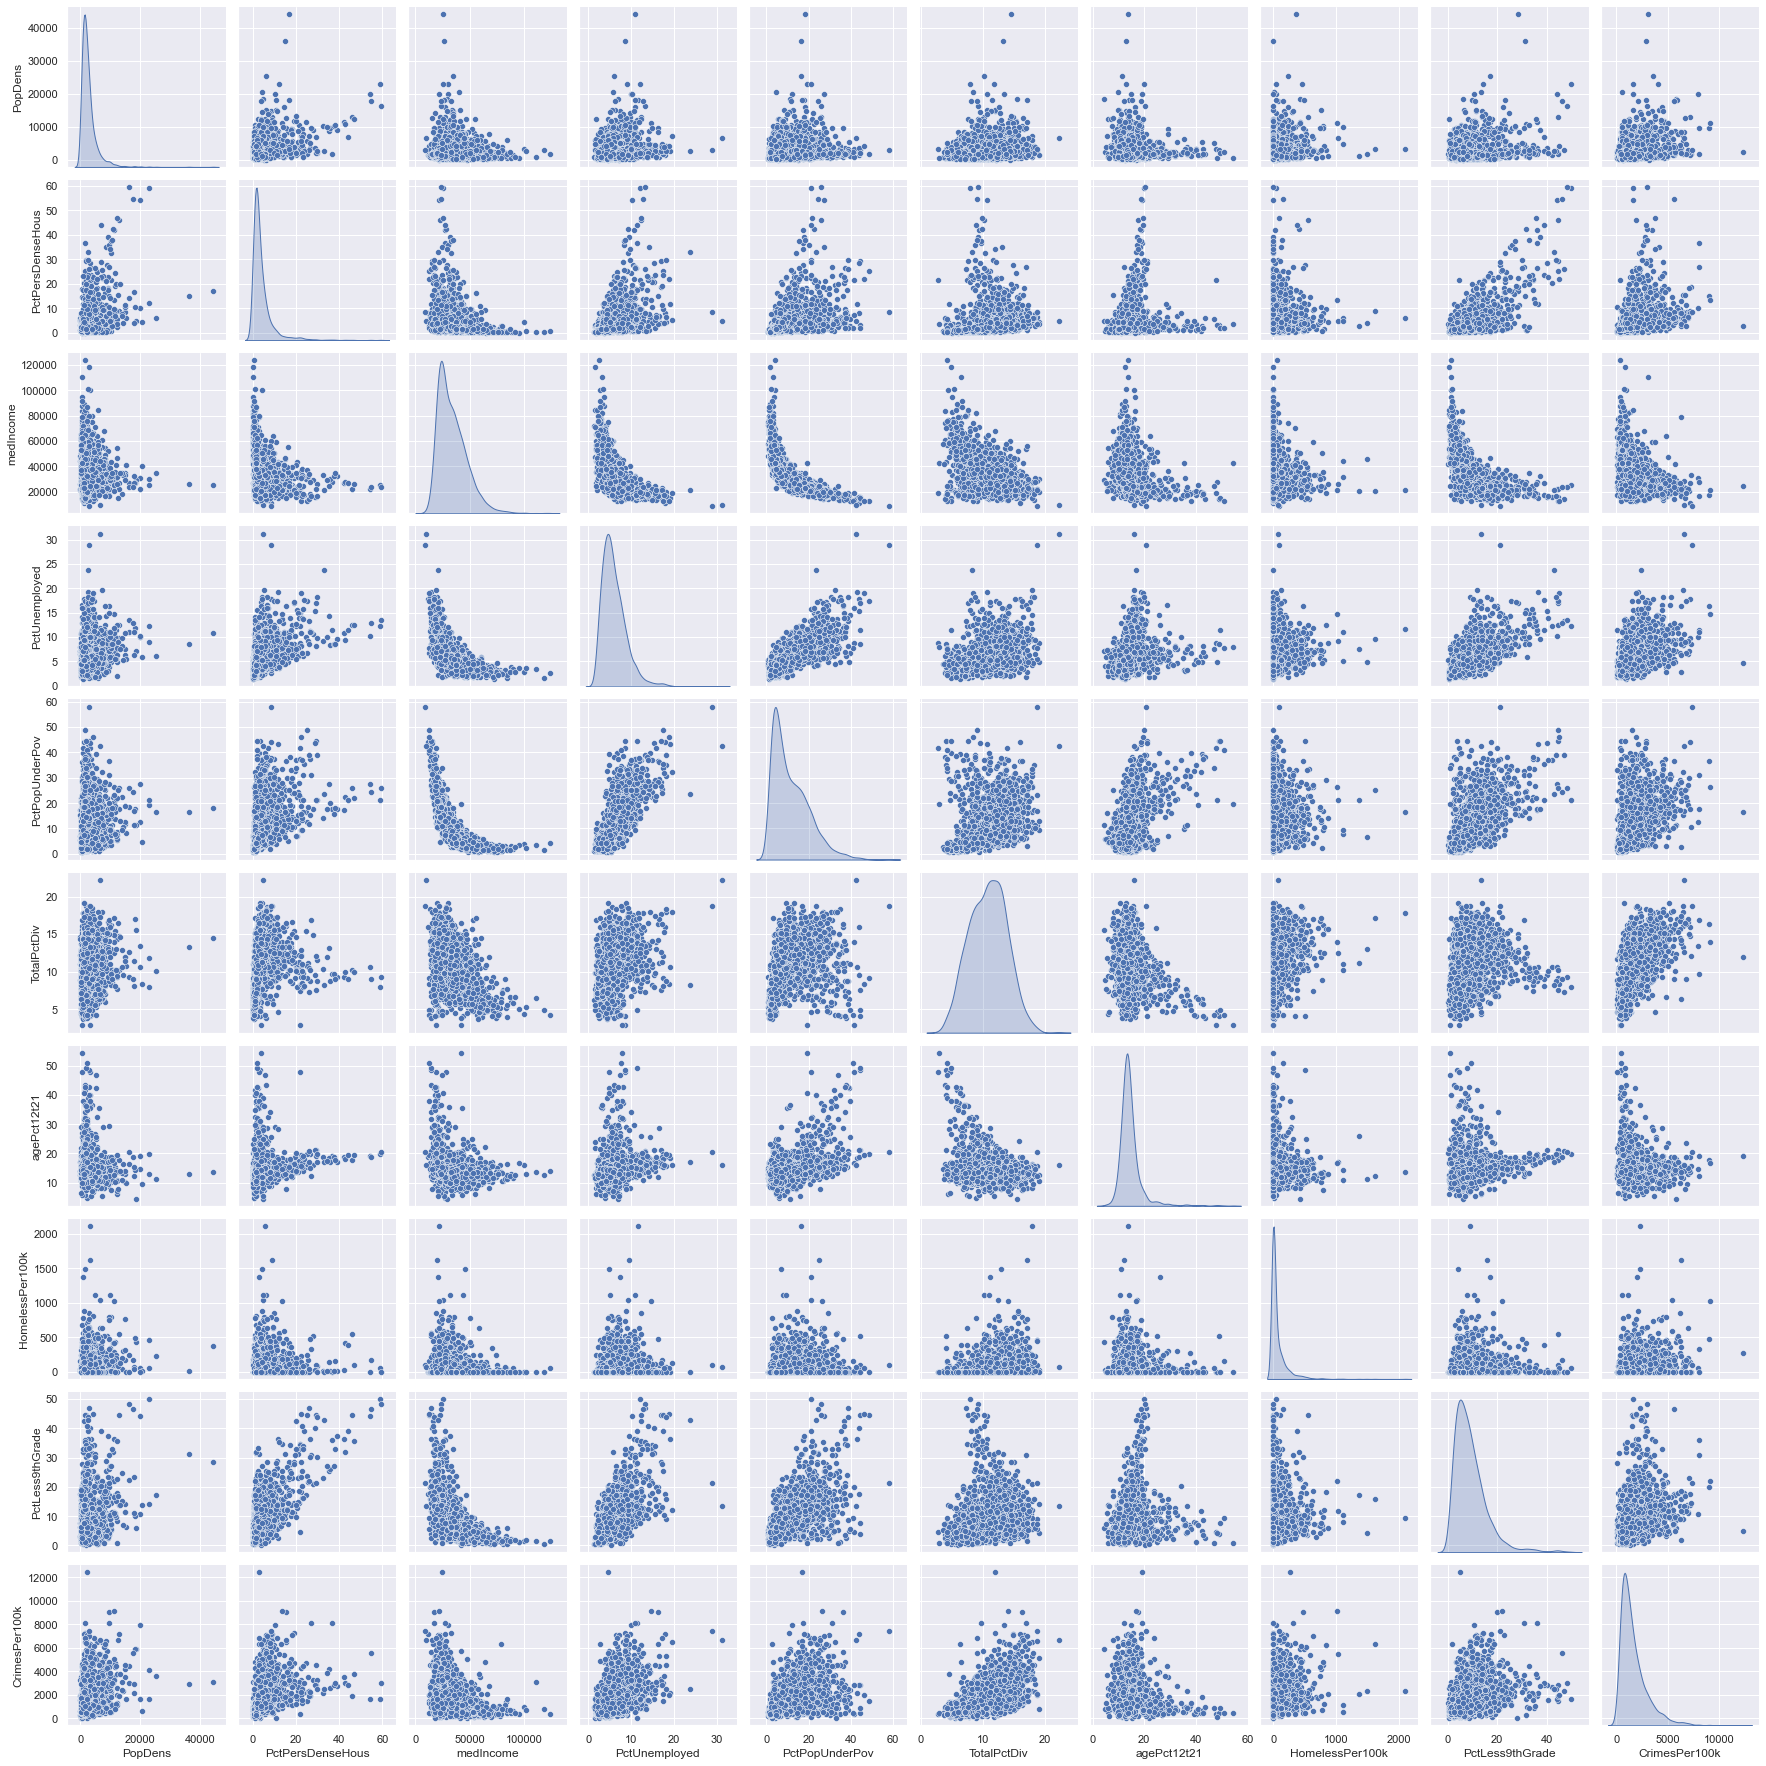

In [265]:
sns.pairplot(project_df[["PopDens","PctPersDenseHous","medIncome","PctUnemployed","PctPopUnderPov","TotalPctDiv","agePct12t21","HomelessPer100k","PctLess9thGrade","CrimesPer100k"]], diag_kind='kde');

From the heat map below, we can also single out attributes that may be co-linear or related to one another. This correlation is a problem because independent variables should stay independent. If the degree of correlation between variables is high enough, it can cause problems when we fit the model and interpret the results later on. The colinearity will reduce the accuracy of the estimates of the regression coeeficients. In such cases, it is not necessary to have both factors in the model. 
- There is strongest positive correlation (0.77) between Percentage of Population living under poverly level and the percentage being unemployed. This correlation is intuitive based on the fact that the unemployed will have significantly less disposable income which will leave them in the poverty region. In the pairplot, we can also observe a positive correlation between these attributes.  
- There is significant negative correlation between median income and percentage living under the poverty line. This also makes sense as income is the key to deciding whether someone is in poverty and also agrees with the downward slope of the curve depicting relationship between medIncome and % living under poverty line in the pairplot above. 
- Correlation Heatmap also suggests that Percentage with less than 9th Grade Education has a somewhat high correlation with Percentage living under Poverty, Percentage living in dense Housing and Percentage of Unemployed. This could be interpreted as not having achieved a certain level of education will render individuals unqualified for the job market and thus gives rise to higher changes of living in poverty as well as dense living conditions. 
- There appears to be little correlation between Youth concentration and the Number of Crimes. There is a possibility this attribute may not be a predictor in our model. 


<AxesSubplot:>

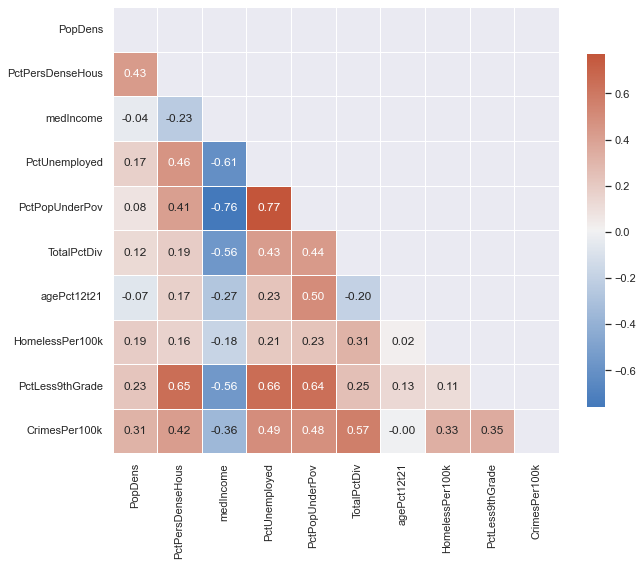

In [291]:
#calculate correlation between pairs of attributes in the project dataframe
project_df_heatmap = project_df[["PopDens","PctPersDenseHous","medIncome","PctUnemployed","PctPopUnderPov","TotalPctDiv","agePct12t21","HomelessPer100k","PctLess9thGrade","CrimesPer100k"]]
project_corr = project_df_heatmap.corr()
#generating mask
project_mask = np.triu(np.ones_like(project_corr,dtype=bool))
f, ax = plt.subplots(figsize = (10,13))
cmap = sns.diverging_palette(250,20, as_cmap = True)
#draw heatmap
sns.heatmap(project_corr, mask = project_mask, cmap = cmap, annot = True, fmt = '.2f', square = True, linewidths =.5, cbar_kws = {"shrink":.5}) 

Key takeaways for model selection:
- Unemployment rate, Percentage of Divorced eopl, Percentage with less than 9th grade education and Percentage living in Poverty pairplots with Crime per 100k population have the outline shape of a positive linear relation. This suggests a linear regression model could be considered. 
- Median Income, Population Density and Youth Concentration pairplots did not show clearly interpretable patterns. As such, it might be worthwhile to consider a polynomial model. 
- Number of Homeless People per 100k does not show a clear pattern (if any) at first look. If this attributed is to be included the model (using multi linear regression), the coefficient is expected to be much smaller than the other 3 predictors. We should also check the 95% confidence interval to ensure that 0 is not within this range and thus there is existence of a correlation. 
- Collinearity between potential attributes: PctUnemployed, PctPopUnderPov, and Median Income have high correlations with one another with absolute values ranging from 0.76 to 0.77 respectively and visible upward/downward trendline from the pairplots. We should note that these all belong to the category of economic condition indicators. When finalizing the model, we needn't include all factors and could choose 1 out of the 3.  

#### e. Model selection

#### e-1. Which model to choose

As discussed above in the EDA session, the plots depicting relationship between three 3 potential input variables (PctUnemployed, PctPopUnderPov and PctLess9thGrade) and the output variable (Crimesper100k) all have overall shape of a positive linear relationship. Thus we can start with considering a multilinear regression model. This model has the benefits of a less-flexible one, namely simplicity with easy interpretation and low variance. Low variance in this case means when we test this out on a different set of data (train vs. test for example), the variance in the fit level will remain low.

It should be noted, as observed above, that the pairplots, while showing an outer shape of a linear relationship, tend to have high density of datapoints at certain portions. In addition, Homelessper100k and MedianIncome plots do not show clear linear patterns with the output variable. Thus, choosing the linear algorithm means the fit will not be as close as it could be. In other words, linear model will have higher bias (the error that is introduced by approximating a complicated real-life problem by a simpler model). 

However, considering the fact that 3 out of the 6 possible predictors have linear-looking subplots with the output variable and the other 3, while not showing any discernible pattern, do not exhibit wildly fluctuating data points, it's still fit to apply the less flexible model of multilinear regression. In addition, it is reassuring that the correlation heatmap in the EDA section shows certain levels of connection between each of the possible input variables with the output variable. Also, the fact that there could be a large number of predictors (up to 9) also suggests that a less felxible model will perform better. 

We could consider polynomial regression to address the possible non-linear relationship between crime rates and Median Income, Number of Homeless People and youth concentration. However, with 6 attributes to consider and 3 of which are assessed to be inter-related, we could end up with a model that would have at least 4 different predictors. The end result from a multivariate polynomial regression model would be too complicated and difficult to interpret. 

In sum up, considering variance and bias trade-off as well as interpretability of the model and the large number of predictors, coupled with what is presented in the EDA session, we will build the predictive model using the multiple linear regression approach which is a less flexible model. With possible collinearity between three variables, we will drop two out of the three in the variable selection process to avoid impacting accuracy of the regression coefficients. 

#### e-2. Deciding on Important Variables

Now that we have decided on a model, next step is to decide how the predictors can be considered.

- Subset selection with Best Subset: since there are 9 potential variables, there will be 2^6 = 512 models to be considered. The benefit of this is we leave no stone unturned and would secure the best model. However, this could take a substantial amount of time. In addition, with 3 attributes having possible collinearity, having to check all of the possible combinations with all these 3 attributes present is not an efficient use of resources. 
- Subset selection with Forward Stepwise: the first advantage is that the approach is less time-consuming. In addition, with the collinearity between medIncome, PctUnemployed and PctUnderPov, we can address the issue as we start with only one of the predictors in the model. We can keep adding until the highest fit is achieved (adjusted R squared) and on the condition that not all three of these attributes are in the model. 
- Subset selection with Backward Stepwise: this approach also saves us more time compared to the best subset approach. In addition, with the collinearity between medIncome, PctUnemployed and PctUnderPov, we can address the issue as we start with all possible predictors and drop the one with highest p-value until all have all p-values below some threshold. 
- Shrinkage with Ridge Regression: I can consider including all predictors in this model using a technique that constrains or regularizes the coefficient estimates that shrinks the coefficient estimates towards zero. This way, the predictors that are not strongly correlated will have less weight in the model. 

Out of these possible approaches, we could apply a mixed approach that combines Forward Stepwise and Backwards Stepwise. This means we will start wth no variables and keep adding adding the variable that provides the best fit. At the same time, if at any point the the p-value for one of the variables in the model rises above a certain threshold (we'll use 0.05 in our model), we will drop that variable. This appoach ensures that we can most efficiently pick the best model while working around the collinearity of medIncome, PctUnemployed, and PctUnderPov and ensuring that the predictors are statistically significant.

We will stopp adding predictors once the R-squared value reaches 0.7


#### f. Implementing model & Model analysis

The first step is to set up the test data and the train data. While we train the model using train data, we want to check model accuracy by cross-checking against the test data. 

We will choose 1000 observations for each set of data with replacements (duplicates possible). 

In [295]:
list_train = np.random.choice(project_df.index, size=1000, replace=True, p=None)
train_data = project_df.loc[list_train]
#Attributes: "PopDens","PctPersDenseHous","medIncome","PctUnemployed","PctPopUnderPov","TotalPctDiv","agePct12t21","HomelessPer100k","PctLess9thGrade","CrimesPer100k"

In [482]:
list_test = np.random.choice(project_df.index, size=1000, replace=True, p=None)
test_data = project_df.loc[list_test]

#### f-1 Model with one predictor
Now we will start adding the input variables to the model, one by one. 
Of all the possible attributes, percentage of population that are divorced yields the 1k model with the highest r^2.
This is in line with what we observed in our EDA section, being a clear upward slope in the plot depicting relationship between TotalPctDiv and CrimesPer100k.

In [619]:
from sklearn.metrics import r2_score
model1k = smf.ols(formula='CrimesPer100k~TotalPctDiv',data=train_data).fit()
test1k = model1k.predict(test_data)
test1k_r2 = r2_score(test_data['CrimesPer100k'],test1k)
#Adj r2 = 1-(1-R2)*(n-1)/(n-k-1)
test1k_adjr2 = 1 - (1-test1k_r2)*(1000-1)/(1000-1-1)
model1k.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CrimesPer100k   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     546.0
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           1.16e-96
Time:                        00:17:24   Log-Likelihood:                -8397.9
No. Observations:                1000   AIC:                         1.680e+04
Df Residuals:                     998   BIC:                         1.681e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1138.4603    125.668     -9.059      0.000   -1385.064    -891.857
TotalPctDiv   262.4350     11.232     23.366      0.000     240.395     284.475
==============================================================================
Omnibus:                      273.599   Durbin-Watson:                   2.147
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              818.077
Skew:                           1.356   Prob(JB):                    2.27e-178
Kurtosis:                       6.504   Cond. No.                         41.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### f-2 Model with two predictors
When adding PctPersDensehous (percentage of population living in dense housing), r^2 value increases significantly with the p values remaining significant.
The synergy between TotalPctDiv and PctPersDensHous suggests that these combined conditions can have amplified effect on the possibility of property crimes. 


In [620]:
model2k = smf.ols(formula='CrimesPer100k~TotalPctDiv*PctPersDenseHous',data=train_data).fit()
test2k = model2k.predict(test_data)
test2k_r2 = r2_score(test_data['CrimesPer100k'],test2k)
#Adj r2 = 1-(1-R2)*(n-1)/(n-k-1)
test2k_adjr2 = 1 - (1-test2k_r2)*(1000-1)/(1000-2-1)
model2k.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CrimesPer100k   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     354.6
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          1.25e-156
Time:                        00:17:28   Log-Likelihood:                -8252.8
No. Observations:                1000   AIC:                         1.651e+04
Df Residuals:                     996   BIC:                         1.653e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     -342.4864    140.576     -2.436      0.015    -618.345     -66.628
TotalPctDiv                    145.5230     13.563     10.729      0.000     118.907     172.139
PctPersDenseHous              -135.5045     23.839     -5.684      0.000    -182.284     -88.725
TotalPctDiv:PctPersDenseHous    21.3366      2.244      9.510      0.000      16.934      25.739
==============================================================================
Omnibus:                      225.516   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              600.664
Skew:                           1.158   Prob(JB):                    3.69e-131
Kurtosis:                       6.009   Cond. No.                         382.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### f-3 Model with three predictors
We now move onto the third element in the model:

- R-squared value does not improve significantly when adding medIncome, PctUnemployed, agePct12t21, HomelessPer100k and PctLess9thGrade (going to 0.553 and below).

- When using PopDens, R-squared is improved to 0.564. However, the p-values for PopDens, PctPersDenseHous:PopDens, TotalPctDiv:PctPersDenseHous:PopDens	all increase to more than 0.05 (0.354, 0.847 and 0.207 respectively). The 95% confidence intervals for these factors now include 0 which means there is a chance that the Null Hypothesis that there is no relationship between them and the response (Crimes per 100k) might stand.

- When using PctUnemployed, R-squared is improved significantly to 0.571. However, the p-values for TotalPctDiv, increases to 0.874. The 95% confidence interval now includes 0 which means that only the interactions between PctPersDensehous, Total Pct Div and PctPopUnderPov have a correlation with the overall crime rates. This also suggests that while the percentage of people that are divorced alone does not impact number of crimes, while coupled with other factors such as high percentge of people are also living in poverty and in dense housing conditions, this combination gives rise to high probability of more property crimes. 

As discussed in section e-2. Deciding on the important variables, we might drop this attribute with high p-value. However, it is mentioned in the ISL textbook (3.3.2), the hierarchical principle states that if we include an interaction in a model, we should also include the main effects, even if the p-values associated with the coefficients are not significant. The reason is that if X_1 x X_2 is related to the response, then whether or not the coefficients of X_1 or X_2 are exactly 0 is of little interest. 

Thus we will use PctPopUnderPov as the third predictor (including interaction/synergy) and keep this coefficient despite the high p-value. 



In [621]:
model3k = smf.ols(formula='CrimesPer100k~TotalPctDiv*PctPersDenseHous*PctPopUnderPov',data=train_data).fit()
test3k = model3k.predict(test_data)
test3k_r2 = r2_score(test_data['CrimesPer100k'],test3k)
#Adj r2 = 1-(1-R2)*(n-1)/(n-k-1)
test3k_adjr2 = 1 - (1-test3k_r2)*(1000-1)/(1000-3-1)
model3k.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CrimesPer100k   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     188.8
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          1.51e-177
Time:                        00:17:31   Log-Likelihood:                -8192.7
No. Observations:                1000   AIC:                         1.640e+04
Df Residuals:                     992   BIC:                         1.644e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                     722.5825    211.106      3.423      0.001     308.316    1136.849
TotalPctDiv                                    -3.6895     23.178     -0.159      0.874     -49.172      41.793
PctPersDenseHous                             -262.0032     54.459     -4.811      0.000    -368.871    -155.135
TotalPctDiv:PctPersDenseHous                   33.6477      5.153      6.530      0.000      23.536      43.760
PctPopUnderPov                                -43.7077     12.746     -3.429      0.001     -68.720     -18.695
TotalPctDiv:PctPopUnderPov                      8.1024      1.268      6.392      0.000       5.615      10.590
PctPersDenseHous:PctPopUnderPov                 5.9214      1.930      3.068      0.002       2.134       9.709
TotalPctDiv:PctPersDenseHous:PctPopUnderPov    -0.6691      0.194     -3.452      0.001      -1.049      -0.289
==============================================================================
Omnibus:                      215.532   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              615.277
Skew:                           1.082   Prob(JB):                    2.48e-134
Kurtosis:                       6.175   Cond. No.                     1.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### f-4 Model with 4 predictors

- With medIncome, R-squared improves to only 0.618 and the highest P-value shot up to 0.869. This suggests that when we have included PctPopUnderPov, which is one of the three economic factors that we suspected were collinear, the addition of other highly correlated adds little predictive information. 
- Similarly with PctUnemployed, improvement in R-squared score is insignificant (by 0.03 compared to the 3-k model) which is also due to the fact that PctUnemployed and PctPopUnderPov are strongly correlated and the addition of one more attribute brings little insight to the model. 
- PctLess9thGrade, HomelessPer100k and agePct12t21 result in minimal inrease in R-squared to 0.599, 0.598 and 0.581 respectively
- When adding Population Density, R-squared value goes up to 0.634 and all P values are less than 0.113. This attribute is not similar to Percentage of Population living in dense housing which could be driven by both economic condition (people with less income sharing rooms to save money) and degree of urbanization (there is limited residential space in cities and central areas leading to higher percentage sharing rooms). On the other hand, population density solely reflects the urbanization degree of a community. The fact that adding Population density as the fourth predictor yields the highest R-squared confirms that coupled with Family conditions (cohesiveness) and Economic conditions (percentage in poverty and in dense housing), information about urbanization also provides valuable predictive insights. 

When choosing Population Density as the fourth predictor with interactions included, PctPersDenseHous:PopDens and TotalPctDiv:PctPopUnderPov:PopDens have p-values above 0.05 (0.113 and 0.074) so we will remove them as we are using a combined forward/backward refinement method. The main effects, TotalPctDiv and PopDens also have p-values greater than 0.05 (0.87 and 0.082); however, considering the hierarchical principle in ISL 3.3.2, we will keep them. 

In [622]:
model4k = smf.ols(formula='CrimesPer100k~TotalPctDiv*PctPersDenseHous*PctPopUnderPov*PopDens - PctPersDenseHous:PopDens - TotalPctDiv:PctPopUnderPov:PopDens - PctPersDenseHous:PctPopUnderPov:PopDens - TotalPctDiv:PctPersDenseHous:PctPopUnderPov:PopDens - TotalPctDiv:PopDens',data=train_data).fit()
test4k = model4k.predict(test_data)
test4k_r2 = r2_score(test_data['CrimesPer100k'],test4k)
#Adj r2 = 1-(1-R2)*(n-1)/(n-k-1)
test4k_adjr2 = 1 - (1-test4k_r2)*(1000-1)/(1000-4-1)
model4k.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CrimesPer100k   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     168.7
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          7.32e-206
Time:                        00:17:41   Log-Likelihood:                -8118.5
No. Observations:                1000   AIC:                         1.626e+04
Df Residuals:                     989   BIC:                         1.631e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                     583.1035    199.214      2.927      0.004     192.174     974.033
TotalPctDiv                                     3.5573     21.738      0.164      0.870     -39.101      46.215
PctPersDenseHous                             -213.9236     52.721     -4.058      0.000    -317.381    -110.466
TotalPctDiv:PctPersDenseHous                   32.3240      4.814      6.714      0.000      22.877      41.771
PctPopUnderPov                                -69.7346     12.321     -5.660      0.000     -93.912     -45.557
TotalPctDiv:PctPopUnderPov                      7.4716      1.195      6.254      0.000       5.127       9.816
PctPersDenseHous:PctPopUnderPov                 4.7404      1.872      2.532      0.011       1.066       8.414
TotalPctDiv:PctPersDenseHous:PctPopUnderPov    -0.5462      0.187     -2.914      0.004      -0.914      -0.178
PopDens                                         0.0384      0.022      1.741      0.082      -0.005       0.082
TotalPctDiv:PctPersDenseHous:PopDens           -0.0010      0.000     -6.934      0.000      -0.001      -0.001
PctPopUnderPov:PopDens                          0.0114      0.002      6.676      0.000       0.008       0.015
==============================================================================
Omnibus:                      217.424   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              683.450
Skew:                           1.058   Prob(JB):                    3.90e-149
Kurtosis:                       6.453   Cond. No.                     4.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### f-5 Model with 5 predictors

With 5 Predictors, the model is getting complex, more interactions we with high p-values that we need to remove, namely:

- PctPersDenseHous:medIncome
- TotalPctDiv:PctPersDenseHous:PctPopUnderPov:PopDens:medIncome 
- PctPersDenseHous:PctPopUnderPov:PopDens:medIncome 
- TotalPctDiv:PctPersDenseHous:PopDens:medIncome 
- PctPersDenseHous:PopDens:medIncome 
- TotalPctDiv:medIncome 
- TotalPctDiv:PopDens:medIncome 
- PopDens:medIncome 
- TotalPctDiv:PctPopUnderPov 
- PctPopUnderPov:medIncome

After removing these, the fit is now 0.662. 

In [645]:
#"PopDens","PctPersDenseHous","medIncome","PctUnemployed","PctPopUnderPov","TotalPctDiv","agePct12t21","HomelessPer100k","PctLess9thGrade",
model5k = smf.ols(formula='CrimesPer100k~TotalPctDiv*PctPersDenseHous*PctPopUnderPov*PopDens*medIncome - PctPersDenseHous:PopDens - TotalPctDiv:PctPopUnderPov:PopDens - PctPersDenseHous:PctPopUnderPov:PopDens - TotalPctDiv:PctPersDenseHous:PctPopUnderPov:PopDens - TotalPctDiv:PopDens - PctPersDenseHous:medIncome - TotalPctDiv:PctPersDenseHous:PctPopUnderPov:PopDens:medIncome - PctPersDenseHous:PctPopUnderPov:PopDens:medIncome - TotalPctDiv:PctPersDenseHous:PopDens:medIncome - PctPersDenseHous:PopDens:medIncome - TotalPctDiv:medIncome - TotalPctDiv:PopDens:medIncome - PopDens:medIncome - TotalPctDiv:PctPopUnderPov - PctPopUnderPov:medIncome',data=train_data).fit()
test5k = model5k.predict(test_data)
test5k_r2 = r2_score(test_data['CrimesPer100k'],test5k)
#Adj r2 = 1-(1-R2)*(n-1)/(n-k-1)
test5k_adjr2 = 1 - (1-test5k_r2)*(1000-1)/(1000-5-1)
model5k.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CrimesPer100k   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     120.5
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          1.47e-218
Time:                        12:06:38   Log-Likelihood:                -8073.3
No. Observations:                1000   AIC:                         1.618e+04
Df Residuals:                     983   BIC:                         1.626e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               346.0938    348.913      0.992      0.321    -338.607    1030.795
TotalPctDiv                                             -70.4732     28.200     -2.499      0.013    -125.813     -15.133
PctPersDenseHous                                       -115.9160     82.715     -1.401      0.161    -278.234      46.402
TotalPctDiv:PctPersDenseHous                             35.3370      7.580      4.662      0.000      20.461      50.213
PctPopUnderPov                                          -61.1521     13.495     -4.531      0.000     -87.634     -34.670
PctPersDenseHous:PctPopUnderPov                          -6.1092      2.388     -2.558      0.011     -10.796      -1.422
TotalPctDiv:PctPersDenseHous:PctPopUnderPov               0.5552      0.226      2.457      0.014       0.112       0.999
PopDens                                                   0.0672      0.032      2.095      0.036       0.004       0.130
TotalPctDiv:PctPersDenseHous:PopDens                     -0.0009      0.000     -6.116      0.000      -0.001      -0.001
PctPopUnderPov:PopDens                                    0.0103      0.003      3.421      0.001       0.004       0.016
medIncome                                                 0.0065      0.004      1.610      0.108      -0.001       0.014
TotalPctDiv:PctPersDenseHous:medIncome                   -0.0003      0.000     -2.610      0.009      -0.001   -7.43e-05
TotalPctDiv:PctPopUnderPov:medIncome                      0.0005   6.92e-05      7.530      0.000       0.000       0.001
PctPersDenseHous:PctPopUnderPov:medIncome                 0.0005      0.000      2.582      0.010       0.000       0.001
TotalPctDiv:PctPersDenseHous:PctPopUnderPov:medIncome -6.248e-05   1.81e-05     -3.449      0.001    -9.8e-05   -2.69e-05
PctPopUnderPov:PopDens:medIncome                      -5.432e-07   1.51e-07     -3.588      0.000    -8.4e-07   -2.46e-07
TotalPctDiv:PctPopUnderPov:PopDens:medIncome            3.98e-08   1.05e-08      3.792      0.000    1.92e-08    6.04e-08
==============================================================================
Omnibus:                      234.749   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              759.262
Skew:                           1.132   Prob(JB):                    1.34e-165
Kurtosis:                       6.619   Cond. No.                     2.60e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+11. This might indicate that 

#### f-6 Model with 6 predictors
- Adding PctUnemployed brings the R-Squared value to 0.689. However, since PctUnemployed, PctPopUnderPov and MedIncome are highly correlated, we need not include this in the model. 
- The next attribute that improves the fit is PctLess9thGrade. Without removing the p-values higher than 0.05, adjusted R_squared is 0.688. After removing them from highest p-value until no p-value above 0.05 is left, the R-squared score is 0.684 which brings us closer to the target fit of 0.7
- P-value for PctPerDenseHous is 0.061 but this attribute would remain in the model considering the hierarchical principle states that if we include an interaction in a model, we should also include the main effects, even if the p-values associated with the coefficients are not significant.

In [626]:
model6k = smf.ols(formula='CrimesPer100k~TotalPctDiv*PctPersDenseHous*PctPopUnderPov*PopDens*medIncome*PctLess9thGrade - PctPersDenseHous:PopDens - TotalPctDiv:PctPopUnderPov:PopDens - PctPersDenseHous:PctPopUnderPov:PopDens - TotalPctDiv:PctPersDenseHous:PctPopUnderPov:PopDens - TotalPctDiv:PopDens - PctPersDenseHous:medIncome - TotalPctDiv:PctPersDenseHous:PctPopUnderPov:PopDens:medIncome - PctPersDenseHous:PctPopUnderPov:PopDens:medIncome - TotalPctDiv:PctPersDenseHous:PopDens:medIncome - PctPersDenseHous:PopDens:medIncome - TotalPctDiv:medIncome - TotalPctDiv:PopDens:medIncome - PopDens:medIncome - TotalPctDiv:PctPopUnderPov - PctPopUnderPov:medIncome - PctPersDenseHous:medIncome:PctLess9thGrade - TotalPctDiv:PctPersDenseHous:PopDens - PctPopUnderPov:PopDens:medIncome - TotalPctDiv:PctPopUnderPov:medIncome - PctPersDenseHous:PctPopUnderPov - TotalPctDiv:PctPersDenseHous:PctLess9thGrade - PctPopUnderPov:medIncome:PctLess9thGrade - TotalPctDiv:PctPersDenseHous:PctPopUnderPov:PctLess9thGrade - PctPersDenseHous:PctPopUnderPov:medIncome:PctLess9thGrade - medIncome:PctLess9thGrade - TotalPctDiv:medIncome:PctLess9thGrade - PctPopUnderPov:PopDens - TotalPctDiv:PctPopUnderPov:PopDens:medIncome - TotalPctDiv:PopDens:medIncome:PctLess9thGrade - TotalPctDiv:PopDens:PctLess9thGrade - PopDens:medIncome:PctLess9thGrade - PopDens:PctLess9thGrade - TotalPctDiv:PctPersDenseHous:PopDens:medIncome:PctLess9thGrade - PctPersDenseHous:PctPopUnderPov:medIncome - TotalPctDiv:PctPersDenseHous:PctPopUnderPov - TotalPctDiv:PctPersDenseHous:PctPopUnderPov:medIncome',data=train_data).fit()
test6k = model6k.predict(test_data)
test6k_r2 = r2_score(test_data['CrimesPer100k'],test6k)
#Adj r2 = 1-(1-R2)*(n-1)/(n-k-1)
test6k_adjr2 = 1 - (1-test6k_r2)*(1000-1)/(1000-6-1)
model6k.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CrimesPer100k   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     80.85
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          3.32e-222
Time:                        00:18:01   Log-Likelihood:                -8040.7
No. Observations:                1000   AIC:                         1.614e+04
Df Residuals:                     973   BIC:                         1.627e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================================
                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                     -1727.9502    425.493     -4.061      0.000   -2562.940    -892.960
TotalPctDiv                                                                     138.3698     26.846      5.154      0.000      85.686     191.053
PctPersDenseHous                                                                -83.7943     44.634     -1.877      0.061    -171.385       3.796
TotalPctDiv:PctPersDenseHous                                                     32.9012      4.515      7.287      0.000      24.041      41.761
PctPopUnderPov                                                                   48.8657      9.777      4.998      0.000      29.679      68.052
PopDens                                                                           0.1023      0.020      5.155      0.000       0.063       0.141
medIncome                                                                         0.0179      0.004      4.055      0.000       0.009       0.027
TotalPctDiv:PctPersDenseHous:medIncome                                           -0.0005      0.000     -3.787      0.000      -0.001      -0.000
PctLess9thGrade                                                                 207.6515     37.390      5.554      0.000     134.277     281.026
TotalPctDiv:PctLess9thGrade                                                     -24.1210      3.631     -6.642      0.000     -31.247     -16.995
PctPersDenseHous:PctLess9thGrade                                                 -9.6558      4.667     -2.069      0.039     -18.814      -0.498
PctPopUnderPov:PctLess9thGrade                                                  -12.3922      2.039     -6.078      0.000     -16.393      -8.391
TotalPctDiv:PctPopUnderPov:PctLess9thGrade                                        0.4044      0.133      3.032      0.002       0.143       0.666
PctPersDenseHous:PctPopUnderPov:PctLess9thGrade                                   0.6776      0.114      5.957      0.000       0.454       0.901
PctPersDenseHous:PopDens:PctLess9thGrade                                          0.0045      0.001      3.291      0.001       0.002       0.007
TotalPctDiv:PctPersDenseHous:PopDens:PctLess9thGrade                             -0.0003   9.84e-05     -2.801      0.005      -0.000   -8.26e-05
PctPopUnderPov:PopDens:PctLess9thGrade                                            0.0016      0.001      2.275      0.023       0.000       0.003
TotalPctDiv:PctPopUnderPov:PopDens:PctLess9thGrade                               -0.0001   4.45e-05     -2.285      0.023      -0.000   -1.43e-05
PctPersDenseHous:

#### f-7 Model with 7 predictors

Now we are on the search for the 7th, and hopefully the last, element to be added to the model. The only three remaining attributes are PctUnemployed, agePct12t21 and HomelessPer100k.

- The addition of PctUnemployed does not increase the model fit significantly (to 0.707). This is in line with the fact that it has a strong collinearity with PctPopUnderPov and Median Income. In other words, the fact that one who is in the labor force but is unemployed would lead to high probablity of the person living in Poverty. 
- Number of Homeless people per 100k does not yield any substantial improvement (to only 0.696). 
- With agePct12t21, R-squared goes up to 0.717 which exceeds the target R-squared. After removing interactions with p-values of more than 0.05, we achieve overall R-squared of 0.717

In [625]:
#"PopDens","PctPersDenseHous","medIncome","PctUnemployed","PctPopUnderPov","TotalPctDiv","agePct12t21","HomelessPer100k","PctLess9thGrade"
model7k = smf.ols(formula='CrimesPer100k~TotalPctDiv*PctPersDenseHous*PctPopUnderPov*PopDens*medIncome*PctLess9thGrade*agePct12t21 - PctPersDenseHous:PopDens - TotalPctDiv:PctPopUnderPov:PopDens - PctPersDenseHous:PctPopUnderPov:PopDens - TotalPctDiv:PctPersDenseHous:PctPopUnderPov:PopDens - TotalPctDiv:PopDens - PctPersDenseHous:medIncome - TotalPctDiv:PctPersDenseHous:PctPopUnderPov:PopDens:medIncome - PctPersDenseHous:PctPopUnderPov:PopDens:medIncome - TotalPctDiv:PctPersDenseHous:PopDens:medIncome - PctPersDenseHous:PopDens:medIncome - TotalPctDiv:medIncome - TotalPctDiv:PopDens:medIncome - PopDens:medIncome - TotalPctDiv:PctPopUnderPov - PctPopUnderPov:medIncome - PctPersDenseHous:medIncome:PctLess9thGrade - TotalPctDiv:PctPersDenseHous:PopDens - PctPopUnderPov:PopDens:medIncome - TotalPctDiv:PctPopUnderPov:medIncome - PctPersDenseHous:PctPopUnderPov - TotalPctDiv:PctPersDenseHous:PctLess9thGrade - PctPopUnderPov:medIncome:PctLess9thGrade - TotalPctDiv:PctPersDenseHous:PctPopUnderPov:PctLess9thGrade - PctPersDenseHous:PctPopUnderPov:medIncome:PctLess9thGrade - medIncome:PctLess9thGrade - TotalPctDiv:medIncome:PctLess9thGrade - PctPopUnderPov:PopDens - TotalPctDiv:PctPopUnderPov:PopDens:medIncome - TotalPctDiv:PopDens:medIncome:PctLess9thGrade - TotalPctDiv:PopDens:PctLess9thGrade - PopDens:medIncome:PctLess9thGrade - PopDens:PctLess9thGrade - TotalPctDiv:PctPersDenseHous:PopDens:medIncome:PctLess9thGrade - PctPersDenseHous:PctPopUnderPov:medIncome - TotalPctDiv:PctPersDenseHous:PctPopUnderPov - TotalPctDiv:PctPersDenseHous:PctPopUnderPov:medIncome - TotalPctDiv:PctPersDenseHous:medIncome:PctLess9thGrade - TotalPctDiv:PctLess9thGrade - PctPersDenseHous:PctLess9thGrade:agePct12t21 - PctPersDenseHous:PctPopUnderPov:PopDens:agePct12t21 - PctPopUnderPov:PopDens:PctLess9thGrade - PctPersDenseHous:PctPopUnderPov:PopDens:medIncome:PctLess9thGrade:agePct12t21 - TotalPctDiv:PctPopUnderPov:PopDens:medIncome:PctLess9thGrade:agePct12t21 - TotalPctDiv:PctLess9thGrade:agePct12t21 - TotalPctDiv:PopDens:agePct12t21 - TotalPctDiv:PctPersDenseHous:PctPopUnderPov:PopDens:medIncome:PctLess9thGrade:agePct12t21 - PctPersDenseHous:PopDens:medIncome:PctLess9thGrade - PctPersDenseHous:PopDens:medIncome:PctLess9thGrade:agePct12t21 - PctPersDenseHous:medIncome:PctLess9thGrade:agePct12t21 - TotalPctDiv:PctPersDenseHous:PctLess9thGrade:agePct12t21 - PctLess9thGrade:agePct12t21 - TotalPctDiv:PctPopUnderPov:PctLess9thGrade - TotalPctDiv:PctPopUnderPov:medIncome:PctLess9thGrade:agePct12t21 - TotalPctDiv:PopDens:medIncome:agePct12t21 - medIncome:agePct12t21 - TotalPctDiv:agePct12t21 - PctPopUnderPov:PopDens:medIncome:PctLess9thGrade - PctPersDenseHous:PctPopUnderPov:PopDens:PctLess9thGrade - PctPersDenseHous:PctPopUnderPov:PopDens:medIncome:PctLess9thGrade - TotalPctDiv:PctPopUnderPov:PopDens:PctLess9thGrade - TotalPctDiv:PctPersDenseHous:PctPopUnderPov:PopDens:medIncome:PctLess9thGrade - TotalPctDiv:PctPersDenseHous:PctPopUnderPov:PctLess9thGrade:agePct12t21 - TotalPctDiv:PctPersDenseHous:PctPopUnderPov:medIncome:PctLess9thGrade:agePct12t21 - TotalPctDiv:medIncome:agePct12t21 - TotalPctDiv:PctPersDenseHous:PctPopUnderPov:agePct12t21 - TotalPctDiv:PctPersDenseHous:PctPopUnderPov:PopDens:medIncome:agePct12t21 - PctPersDenseHous:PopDens:medIncome:agePct12t21 - PctPersDenseHous:PopDens:agePct12t21 - PctPersDenseHous:medIncome:agePct12t21 - TotalPctDiv:PctPopUnderPov:agePct12t21 - TotalPctDiv:PctPopUnderPov:medIncome:agePct12t21 - PctPersDenseHous:agePct12t21 - PctPersDenseHous:PctLess9thGrade - TotalPctDiv:PctPersDenseHous:PopDens:medIncome:PctLess9thGrade:agePct12t21 - PctPopUnderPov:agePct12t21 - TotalPctDiv:PctPopUnderPov:PopDens:agePct12t21 - TotalPctDiv:PctPersDenseHous:medIncome:PctLess9thGrade:agePct12t21 - TotalPctDiv:PctPopUnderPov:PopDens:medIncome:PctLess9thGrade - PctPersDenseHous:PctPopUnderPov:agePct12t21 - PctPersDenseHous:PctPopUnderPov:medIncome:agePct12t21 - PctPopUnderPov:medIncome:agePct12t21',data=train_data).fit()
test7k = model7k.predict(test_data)
test7k_r2 = r2_score(test_data['CrimesPer100k'],test7k)
#Adj r2 = 1-(1-R2)*(n-1)/(n-k-1)
test7k_adjr2 = 1 - (1-test7k_r2)*(1000-1)/(1000-7-1)
model7k.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CrimesPer100k   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     49.27
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          6.73e-218
Time:                        00:17:57   Log-Likelihood:                -8007.4
No. Observations:                1000   AIC:                         1.611e+04
Df Residuals:                     953   BIC:                         1.634e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================================
                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                         307.3411    574.935      0.535      0.593    -820.944    1435.627
TotalPctDiv                                                                        58.1929     31.387      1.854      0.064      -3.404     119.789
PctPersDenseHous                                                                 -130.2529     73.977     -1.761      0.079    -275.430      14.925
TotalPctDiv:PctPersDenseHous                                                       74.9995     11.882      6.312      0.000      51.681      98.318
PctPopUnderPov                                                                     55.1795     17.995      3.066      0.002      19.865      90.494
PopDens                                                                             0.0386      0.049      0.783      0.434      -0.058       0.135
medIncome                                                                           0.0002      0.007      0.032      0.974      -0.013       0.013
TotalPctDiv:PctPersDenseHous:medIncome                                             -0.0021      0.000     -5.726      0.000      -0.003      -0.001
PctLess9thGrade                                                                   -13.3253     36.252     -0.368      0.713     -84.468      57.817
PctPopUnderPov:PctLess9thGrade                                                    -15.4952      2.679     -5.784      0.000     -20.752     -10.238
PctPersDenseHous:PctPopUnderPov:PctLess9thGrade                                     1.3008      0.268      4.861      0.000       0.776       1.826
PctPersDenseHous:PopDens:PctLess9thGrade                                           -0.0068      0.002     -3.676      0.000      -0.010      -0.003
TotalPctDiv:PctPersDenseHous:PopDens:PctLess9thGrade                                0.0011      0.000      4.030      0.000       0.001       0.002
TotalPctDiv:PctPersDenseHous:PctPopUnderPov:PopDens:PctLess9thGrade             -2.702e-05   6.54e-06     -4.135      0.000   -3.98e-05   -1.42e-05
TotalPctDiv:PctPopUnderPov:medIncome:PctLess9thGrade                             6.474e-05   1.02e-05      6.351      0.000    4.47e-05    8.47e-05
TotalPctDiv:PctPersDenseHous:PctPopUnderPov:medIncome:PctLess9thGrade           -4.695e-06   7.91e-07     -5.934      0.000   -6.25e-06   -3.14e-06
agePct12t21                                                                       -51.6801     14.128     -3.658      0.000     -79.405     -23.955
TotalPctDiv:PctPersDenseHous:agePct12t21                                           -4.4712      0.912     -4.904      0.000

#### f-8 Model with Backward Refinement

With the mixed approach starting with Forward Refinement, the model with highest R-Squared has 7 predictors, we can try adopting the Backward selection. 

Starting with all 9 attributes, we gradually dorp the one with the lowest reduction in R-squared. In this case, it was PopDens and PctUnemployed respectively. We also trim interactions with p-values more than 0.05. The main affects with p-values greater than 0.05 are still kept, thanks to the hierarchical principle.

Using this approach, the model with 7 predictors achieves R-squared of 0.728 and adjusted R-squared greater than 0.7. We will cross-check model effectiveness on the test data. 

In [618]:
#"PopDens","PctPersDenseHous","medIncome","PctUnemployed","PctPopUnderPov","TotalPctDiv","agePct12t21","HomelessPer100k","PctLess9thGrade"
model7k_backward = smf.ols(formula='CrimesPer100k~TotalPctDiv*PctPersDenseHous*PctPopUnderPov*PctLess9thGrade*HomelessPer100k*agePct12t21*medIncome - TotalPctDiv:PctPersDenseHous - TotalPctDiv:PctPersDenseHous:PctPopUnderPov:PctLess9thGrade:HomelessPer100k:agePct12t21:medIncome - TotalPctDiv:PctPersDenseHous:PctLess9thGrade - TotalPctDiv:PctPersDenseHous:PctLess9thGrade:HomelessPer100k:agePct12t21:medIncome - TotalPctDiv:PctPopUnderPov:PctLess9thGrade - PctLess9thGrade:HomelessPer100k - PctPersDenseHous:PctLess9thGrade:agePct12t21 - TotalPctDiv:PctPopUnderPov:PctLess9thGrade:HomelessPer100k:medIncome - PctPopUnderPov:PctLess9thGrade - PctPersDenseHous:PctPopUnderPov - TotalPctDiv:PctLess9thGrade:HomelessPer100k:agePct12t21 - TotalPctDiv:PctPopUnderPov:PctLess9thGrade:HomelessPer100k - PctPersDenseHous:PctLess9thGrade:HomelessPer100k:agePct12t21:medIncome - TotalPctDiv:PctPersDenseHous:PctLess9thGrade:agePct12t21:medIncome - TotalPctDiv:medIncome - PctPopUnderPov:PctLess9thGrade:agePct12t21:medIncome - TotalPctDiv:PctPersDenseHous:PctPopUnderPov:PctLess9thGrade:HomelessPer100k - PctPersDenseHous:PctPopUnderPov:PctLess9thGrade:HomelessPer100k:agePct12t21 - PctPopUnderPov:medIncome - TotalPctDiv:HomelessPer100k - TotalPctDiv:PctPopUnderPov:PctLess9thGrade:agePct12t21:medIncome - TotalPctDiv:PctPopUnderPov:PctLess9thGrade:medIncome - TotalPctDiv:PctPersDenseHous:medIncome - PctPopUnderPov:PctLess9thGrade:medIncome - PctPersDenseHous:PctPopUnderPov:medIncome - PctPersDenseHous:agePct12t21 - TotalPctDiv:PctPersDenseHous:agePct12t21 - TotalPctDiv:agePct12t21:medIncome - PctPopUnderPov:agePct12t21 - TotalPctDiv:PctPopUnderPov:PctLess9thGrade:HomelessPer100k:agePct12t21 - PctPopUnderPov:agePct12t21:medIncome - TotalPctDiv:PctPersDenseHous:PctPopUnderPov:medIncome - TotalPctDiv:PctPersDenseHous:PctPopUnderPov - TotalPctDiv:PctLess9thGrade - TotalPctDiv:PctPopUnderPov:medIncome - TotalPctDiv:PctPopUnderPov:agePct12t21:medIncome - TotalPctDiv:PctPopUnderPov - TotalPctDiv:PctLess9thGrade:medIncome - PctLess9thGrade:medIncome - TotalPctDiv:PctPersDenseHous:agePct12t21:medIncome',data=train_data).fit()
test7k_backward = model7k_backward.predict(test_data)
test7k_r2_backward = r2_score(test_data['CrimesPer100k'],test7k_backward)
#Adj r2 = 1-(1-R2)*(n-1)/(n-k-1)
test7k_adjr2_backward = 1 - (1-test7k_r2_backward)*(1000-1)/(1000-7-1)
model7k_backward.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CrimesPer100k   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     28.02
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          2.51e-202
Time:                        00:17:09   Log-Likelihood:                -7965.6
No. Observations:                1000   AIC:                         1.611e+04
Df Residuals:                     912   BIC:                         1.654e+04
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                               -1242.7021    831.015     -1.495      0.135   -2873.627     388.223
TotalPctDiv                                                                               433.2043     50.788      8.530      0.000     333.529     532.880
PctPersDenseHous                                                                          344.5779    108.637      3.172      0.002     131.371     557.785
PctPopUnderPov                                                                              5.5873     29.260      0.191      0.849     -51.838      63.013
PctLess9thGrade                                                                           -42.9982     43.325     -0.992      0.321    -128.026      42.030
PctPersDenseHous:PctLess9thGrade                                                          -96.4047     25.684     -3.753      0.000    -146.812     -45.997
PctPersDenseHous:PctPopUnderPov:PctLess9thGrade                                             7.8173      2.146      3.643      0.000       3.606      12.029
TotalPctDiv:PctPersDenseHous:PctPopUnderPov:PctLess9thGrade                                -0.5570      0.184     -3.027      0.003      -0.918      -0.196
HomelessPer100k                                                                           -74.5558     31.904     -2.337      0.020    -137.170     -11.942
PctPersDenseHous:HomelessPer100k                                                           77.2725     18.146      4.258      0.000      41.660     112.885
TotalPctDiv:PctPersDenseHous:HomelessPer100k                                               -4.5280      1.136     -3.988      0.000      -6.757      -2.300
PctPopUnderPov:HomelessPer100k                                                             10.3119      3.983      2.589      0.010       2.495      18.129
TotalPctDiv:PctPopUnderPov:HomelessPer100k                                                 -1.5532      0.409     -3.798      0.000      -2.356      -0.751
PctPersDenseHous:PctPopUnderPov:HomelessPer100k                                            -3.2975      0.953     -3.460      0.001      -5.168      -1.427
TotalPctDiv:PctPersDenseHous:PctPopUnderPov:HomelessPer100k                                 0.3588      0.086      4.193      0.000       0.191       0.527
TotalPctDiv:PctLess9thGrade:HomelessPer100k                                                 0.4201      0.181      2.326      0.020       0.066       0.775
PctPersDenseHous:PctLess9thGrade:HomelessPer100k                                           -1.6409      0.591     -2.77

#### g. Model result and analysis

#### g-1. Comparing adjusted R-squared between train and test data

Now that a model has been established, we will test it out on our test data to ensure variance between data sets are not significant. Below is a graph that plots the Adjusted R-Squared values on Train data (red dots) vs Test Data (Blue line).

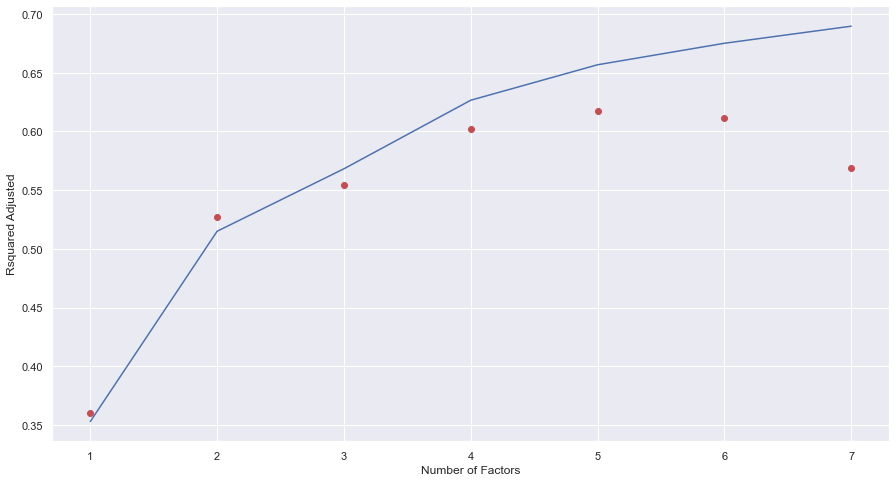

In [627]:
k_values = [1,2,3,4,5,6,7]
adjusted_r_values_train = [model1k.rsquared_adj, model2k.rsquared_adj, model3k.rsquared_adj, model4k.rsquared_adj, model5k.rsquared_adj, model6k.rsquared_adj, model7k.rsquared_adj]
adjusted_r_values_test = [test1k_adjr2,test2k_adjr2,test3k_adjr2,test4k_adjr2,test5k_adjr2,test6k_adjr2,test7k_adjr2]
plt.figure(figsize=(15,8))
plt.plot(k_values, adjusted_r_values_test, 'ro');
plt.plot(k_values, adjusted_r_values_train, 'b-');
plt.xlabel('Number of Factors')
plt.ylabel('Rsquared Adjusted');
plt.show();

#### g-2 Checking residuals

Below is the Leverage vs. Residual Squared Plot. This indicates that some rows have high leverage but small residuals and others have high residual. We will remove those with high leverage and check if R-squared is improved).


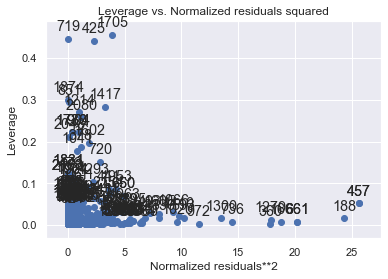

In [594]:
sm.graphics.plot_leverage_resid2(model5k, alpha=0.05);


After dropping these, the r-squared value is not changed significantly, this suggests the data did not contain abnormalities that skewed the fit of the model. 

In [628]:
train_data_drop3 = train_data.drop([719,425,1705])
model5k_drop = smf.ols(formula='CrimesPer100k~TotalPctDiv*PctPersDenseHous*PctPopUnderPov*PopDens*medIncome - PctPersDenseHous:PopDens - TotalPctDiv:PctPopUnderPov:PopDens - PctPersDenseHous:PctPopUnderPov:PopDens - TotalPctDiv:PctPersDenseHous:PctPopUnderPov:PopDens - TotalPctDiv:PopDens - PctPersDenseHous:medIncome - TotalPctDiv:PctPersDenseHous:PctPopUnderPov:PopDens:medIncome - PctPersDenseHous:PctPopUnderPov:PopDens:medIncome - TotalPctDiv:PctPersDenseHous:PopDens:medIncome - PctPersDenseHous:PopDens:medIncome - TotalPctDiv:medIncome - TotalPctDiv:PopDens:medIncome - PopDens:medIncome - TotalPctDiv:PctPopUnderPov - PctPopUnderPov:medIncome - TotalPctDiv:PctPersDenseHous:PctPopUnderPov - PctPersDenseHous:PctPopUnderPov - PctPersDenseHous:PctPopUnderPov:medIncome',data=train_data_drop3).fit()
test5k_drop = model5k_drop.predict(test_data)
test5k_r2_drop = r2_score(test_data['CrimesPer100k'],test5k_drop)
#Adj r2 = 1-(1-R2)*(n-1)/(n-k-1)
test5k_adjr2_drop = 1 - (1-test5k_r2_drop)*(1000-1)/(1000-5-1)
print("The adjusted R-squared on the model after dropping observations with high leverage and those with high residual is",test5k_adjr2_drop)

The adjusted R-squared on the model after dropping observations with high leverage and those with high residual is 0.6140535832060259


#### g-3 Model analysis


   Based on what is observed in the plot depicting adjusted R2 vs number of predictors adjusted 𝑅2 for the test data, we can see that model with 5 main effects and selected interactions has the best fit for test data. With 5 predictors, it will be easier with interpretating the results. For models with 6 and 7 predictors, the number of coefficients increases exponentially. As such, since the 5-predictor model balances between accuracy and interpretability, we will choose it as our result for further discussion. 
   Below is the summary of the 5-predictor model. The 5 key predictors in this model (chosen using combination of forward stepwise and backward selection) are Total Percentage of Population that are divorced, Percentage living in dense housing, Population percentage living under Poverty, Population Density and Median Income. Using this model and the selected interactions, the achieved adjusted R-squared is 0.657. 
   Note that for each of the model, when removing interactions, the R-squared score reduces significantly. This proves that when considered in isolation, each of these factors may not have a significant impact on thenumber of crimes; however, a combination of factors would amplify the impact and leads to higher probability of higher number of property crimes. For example, a high number of individuals who are divorced may not suggest much, but when we couple that with Percentage of population living in dense housing and lower median income, that might spell more trouble. This translates into the model below, which says the interaction between TotalPctDiv and PctPersDenseHous have a positive linear impact on Crimes Per 100k (coefficient of 35.337). 
   The first predictor that was added to the model, TotalPctDiv also exhibited highest correlation with the response (Crimes per 100k) per the heatmap in the EDA session. This suggests, surprisingly, that family cohesiveness, among other factors, does have an impact on the number of property crimes in a community. However, notice that the coefficients for TotalPctDiv, PctPersDensehouse and PctPopUnderPov actually have negative coefficients. This refute the common beliefs that households with divorced parents or those with lower income are more prone to crimes. Interestingly, When higher Percentage of Divorced is coupled with Dense housing condition, these somehow have positive impact on the number of property crimes.
   
   

In [657]:
model5k = smf.ols(formula='CrimesPer100k~TotalPctDiv*PctPersDenseHous*PctPopUnderPov*PopDens*medIncome - PctPersDenseHous:PopDens - TotalPctDiv:PctPopUnderPov:PopDens - PctPersDenseHous:PctPopUnderPov:PopDens - TotalPctDiv:PctPersDenseHous:PctPopUnderPov:PopDens - TotalPctDiv:PopDens - PctPersDenseHous:medIncome - TotalPctDiv:PctPersDenseHous:PctPopUnderPov:PopDens:medIncome - PctPersDenseHous:PctPopUnderPov:PopDens:medIncome - TotalPctDiv:PctPersDenseHous:PopDens:medIncome - PctPersDenseHous:PopDens:medIncome - TotalPctDiv:medIncome - TotalPctDiv:PopDens:medIncome - PopDens:medIncome - TotalPctDiv:PctPopUnderPov - PctPopUnderPov:medIncome',data=train_data).fit()
model5k.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          CrimesPer100k   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     120.5
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          1.47e-218
Time:                        15:58:03   Log-Likelihood:                -8073.3
No. Observations:                1000   AIC:                         1.618e+04
Df Residuals:                     983   BIC:                         1.626e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                               346.0938    348.913      0.992      0.321    -338.607    1030.795
TotalPctDiv                                             -70.4732     28.200     -2.499      0.013    -125.813     -15.133
PctPersDenseHous                                       -115.9160     82.715     -1.401      0.161    -278.234      46.402
TotalPctDiv:PctPersDenseHous                             35.3370      7.580      4.662      0.000      20.461      50.213
PctPopUnderPov                                          -61.1521     13.495     -4.531      0.000     -87.634     -34.670
PctPersDenseHous:PctPopUnderPov                          -6.1092      2.388     -2.558      0.011     -10.796      -1.422
TotalPctDiv:PctPersDenseHous:PctPopUnderPov               0.5552      0.226      2.457      0.014       0.112       0.999
PopDens                                                   0.0672      0.032      2.095      0.036       0.004       0.130
TotalPctDiv:PctPersDenseHous:PopDens                     -0.0009      0.000     -6.116      0.000      -0.001      -0.001
PctPopUnderPov:PopDens                                    0.0103      0.003      3.421      0.001       0.004       0.016
medIncome                                                 0.0065      0.004      1.610      0.108      -0.001       0.014
TotalPctDiv:PctPersDenseHous:medIncome                   -0.0003      0.000     -2.610      0.009      -0.001   -7.43e-05
TotalPctDiv:PctPopUnderPov:medIncome                      0.0005   6.92e-05      7.530      0.000       0.000       0.001
PctPersDenseHous:PctPopUnderPov:medIncome                 0.0005      0.000      2.582      0.010       0.000       0.001
TotalPctDiv:PctPersDenseHous:PctPopUnderPov:medIncome -6.248e-05   1.81e-05     -3.449      0.001    -9.8e-05   -2.69e-05
PctPopUnderPov:PopDens:medIncome                      -5.432e-07   1.51e-07     -3.588      0.000    -8.4e-07   -2.46e-07
TotalPctDiv:PctPopUnderPov:PopDens:medIncome            3.98e-08   1.05e-08      3.792      0.000    1.92e-08    6.04e-08
==============================================================================
Omnibus:                      234.749   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              759.262
Skew:                           1.132   Prob(JB):                    1.34e-165
Kurtosis:                       6.619   Cond. No.                     2.60e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+11. This might indicate that 

### h. Conclusion

   Based on the factor of crimes mentioned by the Beureau of Investigation, we shortlisted the possible predictors for the number of property crimes per 100k population in a community (burglaries, robberies and auto-thefts). This project uses multilinear regression model for lower variance due to high number of predictors present as well as ease of interpretation. By using a combination of forward and backward stepwise selection which adds predictors one by one with interactions while eliminating those with p-values of more than 0.05, our final model has 5 predictors which are TotalPctDiv, PctPersDenseHous, PctPopUnderPov, PopDens and medIncome with R-squared of 0.662. 
   This shows that family cohesiveness, economic conditions and density of population have an impact on the number of crimes. However, contrary to expectation that the relationships would be positively linear, the coefficients for Percentage of Divorced population, Percentage living in Dense housing and Percentage living Under Poverty are actually individually negative. There are many ways to interpret this, but it could mean that the perpertrators might prefer to target high income areas for more valuable items as well as communities that don've have high density such that there would be lower likelihood of getting caught and being conrfronted. 
   One thing to note from the model is that when Percentage of Divorced people is combined with Percentage of people living in dense housing, this interaction has a positive impact on the number of property crimes. This reiterates the importance of assessing interaction/synergies between variables when building a model. 
   Another takaaway is the fact that while we achieved the highest R-squared with 7-predictor model, the adjusted r-squared number turns out to be highest for 5-predictor model which is a good example of the difference between train and test data and the problem of overfitting. When trying to fit data too closely for the train set, there's a chance we might end up with high variance when applying that same model on another set of data. 
   The adjusted R-squared of 0.662 leaves room for improvement. There are two unexplored options that could improve the fit of the model. Firstly, as shown in the EDA part, we can consider factoring in non-linearity by using polynomial model. With this option of a more flexible model, we might need to decrease the number of predictors further. In addition, due to the limited data available for police-related data, we could not consider it in our model but according to the list of factors impacting number of crimes, the relative strength of law enforcement agencies and crime reporting practices do play a part. The fit of our model could have been imrpoved by incorporating more relevant predictors. 